# Causes derrière la consommation de drogue 

Vous allez retouver sur ce notebook les différentes analyses effectuées dans l'optique de répondre à la problématique suivante :
- Peut-on prédire la consommation de drogue "dure" selon la personnalité et l'environnement des jeunes? 

URL to our dataset : https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Le dataset que nous allons traité a été collecté en 2016. 
Le traitement de notre data passera par un travail de classification afin de déterminer si des profils ressortent dans notre dataset.

Poure ce faire, nous allons passer par les étapes suivantes :
- Data Cleaning 
- Exploration de la data
- Visualisation de la data
- Action (ML models etc )

### I. Chargement et Description des données 

In [960]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML 

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [961]:
# chargement des données
# noms des colonnes

data =  pd.read_csv('drug_consumption.data', sep=",", header = None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [962]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1885 non-null   int64  
 1   1       1885 non-null   float64
 2   2       1885 non-null   float64
 3   3       1885 non-null   float64
 4   4       1885 non-null   float64
 5   5       1885 non-null   float64
 6   6       1885 non-null   float64
 7   7       1885 non-null   float64
 8   8       1885 non-null   float64
 9   9       1885 non-null   float64
 10  10      1885 non-null   float64
 11  11      1885 non-null   float64
 12  12      1885 non-null   float64
 13  13      1885 non-null   object 
 14  14      1885 non-null   object 
 15  15      1885 non-null   object 
 16  16      1885 non-null   object 
 17  17      1885 non-null   object 
 18  18      1885 non-null   object 
 19  19      1885 non-null   object 
 20  20      1885 non-null   object 
 21  21      1885 non-null   object 
 22  

Nom de chaque colonne : 

In [963]:
names_column = ['ID','age','gender','education','country','ethnicity','nscore','escore','oscore','ascore','cscore','iscore','sscore','alcohol','amphet','amyl','benzos','caff','canabis','choc','coke','crack','ecstasy','heroin','ketamine','legalhigh','LSD','meth','mushrooms','nicotine','semer','VSabuse']

In [964]:
columns_dict = dict(zip(list(range(len(data.columns))),names_column))

data.rename(columns = columns_dict, inplace = True)

#data.rename( columns = names_column )

Nous avons trois Grands types de colonnes : 
- Colonnes décrivant le profil de l'individu ( CPRFL )
- Colonnes décrivant la personnalité de l'individu ( CPRSL )
- Colonnes décrivant la fréquence de consommation de drogues ( CFCD )


In [965]:
data_CPROFIL = data.iloc[:,0:6]
data_CPERSONALITY = data.iloc[:,6:13]
data_CDRUG = data.iloc[:,13:31]

Décrivons en premier lieu les colonnes décrivant le profil de l'individu\
Les colonnes CPRFL :
- ID : Categorical variable
- Age : Interval variable 
- Genre : Categorical variable 
- Education : Ordinal Variable 
- Pays : Categorical Variable 
- Ethnicité : Categorical Variable 

Soit 6 colonnes.

In [966]:
for i in range(1,6) :
    print('La colonne \'',names_column[i],'\' a ',len(data_CPROFIL.iloc[:,i].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')
    


La colonne ' age ' a  6  valeurs uniques  [ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213] 

La colonne ' gender ' a  2  valeurs uniques  [ 0.48246 -0.48246] 

La colonne ' education ' a  9  valeurs uniques  [-0.05921  1.98437  1.16365 -1.22751 -1.7379   0.45468 -0.61113 -2.43591
 -1.43719] 

La colonne ' country ' a  7  valeurs uniques  [ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841] 

La colonne ' ethnicity ' a  7  valeurs uniques  [ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725] 



Nous pouvons observer que les colonnes CPRFL sont dans l'ensemble catégorique (même si à première vue, les valeurs étant numériques, nous aurions pu penser autrement). 

Décrivons en premier lieu les colonnes décrivant le profil de l'individu\
Les colonnes CPRSL:

- les colonnes se basant sur le test NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness),
- la colonne impulsivité selon le test BIS-11 (impulsivity), 
- la colonne de sensation selon le test ImpSS (sensation seeking)

Soit 7 colonnes.

In [967]:
for i in range(0,) :
    print('La colonne \'',names_column[i],'\' a ',len(data.iloc[:,i].unique()),' valeurs uniques ',data.iloc[:,i].unique(),'\n')
    


Nous pouvons observer que les colonnes CPRSL sont dans l'ensemble catégorique (même si à première vue, les valeurs étant numériques, nous aurions pu penser autrement). 

Décrivons en premier lieu les colonnes décrivant le profil de l'individu\
Les colonnes CPRSL:
- les colonnes se basant sur le test NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness),
- la colonne impulsivité selon le test BIS-11 (impulsivity), 
- la colonne de sensation selon le test ImpSS (sensation seeking)

Soit 7 colonnes.

In [968]:
data.describe

<bound method NDFrame.describe of         ID      age   gender  education  country  ethnicity   nscore   escore  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.127

- 1884 rows -> 1884 d'individus 
- 32 columns : 32 caractéristiques d'individus

### II. Data Cleaning 

Cette partie sera dédiée au nettoyage (renommer les colonnes,reset des index, drop des colonnes, ) et à la mise en forme de la donnée pour que cette dernière soit prête à l'exploitation

In [969]:
data.head()

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Nous pouvons observer que le nom de nos colonnes n'est pas bonne.\
Nous vérifierons que la première ligne reste la première ligne et que la dernière ligne reste la dernière ligne même après nos différentes mises en forme. 

In [970]:
first_row = data.iloc[0]
last_row = data.iloc[-1]

In [971]:
pd.DataFrame(first_row).T

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0


In [972]:
pd.DataFrame(last_row).T

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.127,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


First row : " 0.49788	0.48246	-0.05921	0.96082	0.12600	0.31287	-0.57545	-0.58331	-0.91699	...	CL0.4	CL0.5	CL0.6	CL0.7	CL0.8	CL0.9	CL0.10	CL2.2	CL0.11	CL0.12 "

In [973]:
display(data.head(2))
display(data.tail(2))

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


On peut voir qu'il ya un décalage étrange entre l'écart initial de l'ID et de l'index aux premières lignes et l'écart qu'on voit aux dernières lignes.\
Nous allons donc voir à quel niveau l'aggrandissement de l'écart occurre en comparant les valeurs index et ID

In [974]:
# On commence par décaler les valeurs de la colonne ID 
# afin qu'elle puisse matcher avec les valeurs des index

data['ID'].index = data['ID'].index + 1 
Data_ID = pd.concat([pd.Series([0]),data['ID'][:-1]])
Data_ID

C:\Users\arthu\AppData\Local\Temp\ipykernel_16724\2102262434.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Data_ID = pd.concat([pd.Series([0]),data['ID'][:-1]])


0          0
1          1
2          2
3          3
4          4
        ... 
1880    1883
1881    1884
1882    1885
1883    1886
1884    1887
Length: 1885, dtype: int64

In [975]:
# et on compare
pd.Series(data.index).compare(Data_ID)

,self,other
294,294.0,295.0
295,295.0,296.0
296,296.0,297.0
297,297.0,298.0
298,298.0,300.0
...,...,...
1880,1880.0,1883.0
1881,1881.0,1884.0
1882,1882.0,1885.0
1883,1883.0,1886.0


Avec cette comparaison nous pouvons affirmer que le décalage a commencé avec la ligne 294.

Vérifions qu'il n y ait pas d'anomalie aux alentours de cette ligne.

In [976]:
data.iloc[290:296]

,ID,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalhigh,LSD,meth,mushrooms,nicotine,semer,VSabuse
290,291,0.49788,0.48246,-0.05921,0.96082,-1.10702,-0.92104,0.96248,-0.84732,1.45039,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
291,292,0.49788,0.48246,-0.61113,0.96082,-0.31685,0.62967,-1.09207,0.44585,-0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL4,CL0,CL0
292,293,1.09449,0.48246,-0.05921,0.96082,-0.31685,-0.05188,-0.15487,-0.58331,-0.60633,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
293,295,-0.07854,0.48246,-0.05921,0.96082,-0.31685,1.13281,0.00332,-0.17779,-0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL1
294,296,-0.95197,0.48246,-1.43719,0.96082,-0.31685,-0.34799,0.47617,-0.17779,-0.60633,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
295,297,0.49788,-0.48246,-0.05921,0.96082,-0.31685,1.37297,-0.43999,0.14143,-0.01729,...,CL0,CL2,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0


Aucune anomalie à priori, il manque seulement un individu dont l'identifiant est '294'.\
On pourra dans la phase 'Action' si besoin le créer et prédire ses scores et sa fréquence de consommation selon un profil.

In [977]:
data.columns

Index(['ID', 'age', 'gender', 'education', 'country', 'ethnicity', 'nscore',
       'escore', 'oscore', 'ascore', 'cscore', 'iscore', 'sscore', 'alcohol',
       'amphet', 'amyl', 'benzos', 'caff', 'canabis', 'choc', 'coke', 'crack',
       'ecstasy', 'heroin', 'ketamine', 'legalhigh', 'LSD', 'meth',
       'mushrooms', 'nicotine', 'semer', 'VSabuse'],
      dtype='object')

In [978]:
data.isna().sum()

ID           0
age          0
gender       0
education    0
country      0
ethnicity    0
nscore       0
escore       0
oscore       0
ascore       0
cscore       0
iscore       0
sscore       0
alcohol      0
amphet       0
amyl         0
benzos       0
caff         0
canabis      0
choc         0
coke         0
crack        0
ecstasy      0
heroin       0
ketamine     0
legalhigh    0
LSD          0
meth         0
mushrooms    0
nicotine     0
semer        0
VSabuse      0
dtype: int64

- Bon point : Nous n'avons aucune valeur nulle dans le tableau

#### Nous allons désormais drop les colonnes qui ne sont soit
- pas cohérentes avec la problématique 
- pas cohérentes avec le reste des variables

In [979]:
# data_CPROFIL
# data_CPERSONALITY
# data_CDRUG

MAPPING 1

In [980]:
data_CPROFIL_Visual = data_CPROFIL.copy()

map_dict_age = {-0.95197:"18-24", -0.07854:"25-34", 0.49788:"35-44", 1.09449:"45-54", 1.82213:"55-64", 2.59171:"65+"}
data_CPROFIL_Visual["age"] = data_CPROFIL_Visual["age"].map(map_dict_age)

map_dict_gender = {0.48246:"Female", -0.48246:"Male"}
data_CPROFIL_Visual["gender"] = data_CPROFIL_Visual["gender"].map(map_dict_gender)

map_dict_education = {-2.43591:"Left school before 16 years", -1.73790:"Left school at 16 years", -1.43719:"Left school at 17 years", -1.22751:"Left school at 18 years", -0.61113:"Some college or university, no certificate or degree", -0.05921:"Professional certificate/ diploma", 0.45468:"University degree", 1.16365:"Masters degree", 1.98437:"Doctorate degree"}
data_CPROFIL_Visual["education"] = data_CPROFIL_Visual["education"].map(map_dict_education)

map_dict_country = {-0.09765:"Australia", 0.24923:"Canada", -0.46841:"New Zealand", -0.28519:"Other", 0.21128:"Republic of Ireland", 0.96082:"UK", -0.57009:"USA"}
data_CPROFIL_Visual["country"] = data_CPROFIL_Visual["country"].map(map_dict_country)

map_dict_ethnicity = {-0.50212:"Asian", -1.10702:"Black", 1.90725:"Mixed-Black/Asian", 0.12600:"Mixed-White/Asian", -0.22166:"Mixed-White/Black", 0.11440:"Other", -0.31685:"White"}
data_CPROFIL_Visual["ethnicity"] = data_CPROFIL_Visual["ethnicity"].map(map_dict_ethnicity)


data_CPROFIL_Visual

,ID,age,gender,education,country,ethnicity
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian
1,2,25-34,Male,Doctorate degree,UK,White
2,3,35-44,Male,Professional certificate/ diploma,UK,White
3,4,18-24,Female,Masters degree,UK,White
4,5,35-44,Female,Doctorate degree,UK,White
...,...,...,...,...,...,...
1880,1884,18-24,Female,"Some college or university, no certificate or ...",USA,White
1881,1885,18-24,Male,"Some college or university, no certificate or ...",USA,White
1882,1886,25-34,Female,University degree,USA,White
1883,1887,18-24,Female,"Some college or university, no certificate or ...",USA,White


MAPPING 2

In [981]:
data_CPERSONALITY.head(5)

,nscore,escore,oscore,ascore,cscore,iscore,sscore
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [982]:
data_CPERSONALITY_Visual = data_CPERSONALITY.copy()

data_CPERSONALITY_Visual["nscore"] = data_CPERSONALITY_Visual["nscore"] - data_CPERSONALITY_Visual["nscore"].min()
nscore_factor = 100 / data_CPERSONALITY_Visual["nscore"].max()
data_CPERSONALITY_Visual["nscore"] = data_CPERSONALITY_Visual["nscore"] * nscore_factor

data_CPERSONALITY_Visual["escore"] = data_CPERSONALITY_Visual["escore"] - data_CPERSONALITY_Visual["escore"].min()
escore_factor = 100 / data_CPERSONALITY_Visual["escore"].max()
data_CPERSONALITY_Visual["escore"] = data_CPERSONALITY_Visual["escore"] * escore_factor

data_CPERSONALITY_Visual["oscore"] = data_CPERSONALITY_Visual["oscore"] - data_CPERSONALITY_Visual["oscore"].min()
oscore_factor = 100 / data_CPERSONALITY_Visual["oscore"].max()
data_CPERSONALITY_Visual["oscore"] = data_CPERSONALITY_Visual["oscore"] * oscore_factor

data_CPERSONALITY_Visual["ascore"] = data_CPERSONALITY_Visual["ascore"] - data_CPERSONALITY_Visual["ascore"].min()
ascore_factor = 100 / data_CPERSONALITY_Visual["ascore"].max()
data_CPERSONALITY_Visual["ascore"] = data_CPERSONALITY_Visual["ascore"] * ascore_factor

data_CPERSONALITY_Visual["cscore"] = data_CPERSONALITY_Visual["cscore"] - data_CPERSONALITY_Visual["cscore"].min()
cscore_factor = 100 / data_CPERSONALITY_Visual["cscore"].max()
data_CPERSONALITY_Visual["cscore"] = data_CPERSONALITY_Visual["cscore"] * cscore_factor

data_CPERSONALITY_Visual["iscore"] = data_CPERSONALITY_Visual["iscore"] - data_CPERSONALITY_Visual["iscore"].min()
iscore_factor = 100 / data_CPERSONALITY_Visual["iscore"].max()
data_CPERSONALITY_Visual["iscore"] = data_CPERSONALITY_Visual["iscore"] * iscore_factor

data_CPERSONALITY_Visual["sscore"] = data_CPERSONALITY_Visual["sscore"] - data_CPERSONALITY_Visual["sscore"].min()
sscore_factor = 100 / data_CPERSONALITY_Visual["sscore"].max()
data_CPERSONALITY_Visual["sscore"] = data_CPERSONALITY_Visual["sscore"] * sscore_factor


data_CPERSONALITY_Visual

,nscore,escore,oscore,ascore,cscore,iscore,sscore
0,56.056210,41.211633,43.568983,36.765377,49.904023,42.847430,22.439822
1,41.347434,79.610590,76.256651,60.982692,47.939446,33.792023,46.565805
2,44.478792,62.297606,39.293892,26.606069,35.358046,21.540083,61.995745
3,49.204472,37.688344,52.702274,58.521343,58.441530,21.540083,22.439822
4,62.327534,25.054445,45.699485,45.645372,68.850812,42.847430,46.565805
...,...,...,...,...,...,...,...
1880,33.688963,76.587465,83.539901,60.982692,33.577342,62.973510,100.000000
1881,47.754994,76.587465,62.459963,60.982692,28.085418,62.973510,71.093268
1882,68.224579,28.979544,32.359923,24.425291,30.010449,56.534264,38.811712
1883,64.931756,20.651022,57.765151,26.606069,12.863415,70.506794,82.575165


#Some visualisations

In [983]:
test_visual = data_CPROFIL_Visual.join(data_CPERSONALITY_Visual)[["age", "nscore", "escore", "oscore", "ascore", "cscore", "iscore", "sscore"]]
test_visual.head(3)

,age,nscore,escore,oscore,ascore,cscore,iscore,sscore
0,35-44,56.056210,41.211633,43.568983,36.765377,49.904023,42.847430,22.439822
1,25-34,41.347434,79.610590,76.256651,60.982692,47.939446,33.792023,46.565805
2,35-44,44.478792,62.297606,39.293892,26.606069,35.358046,21.540083,61.995745


In [984]:
test_visual_group_age = test_visual.groupby(by = "age").mean().reset_index()
test_visual_group_age

,age,nscore,escore,oscore,ascore,cscore,iscore,sscore
0,18-24,53.121507,50.299201,58.139516,48.655065,46.202303,51.663671,61.950179
1,25-34,52.435547,50.896395,52.492604,50.437010,50.988309,46.419490,52.238524
2,35-44,51.260460,48.603182,48.746490,49.680422,51.970657,43.806266,44.641958
3,45-54,48.371312,50.262434,49.360824,52.847869,53.120226,42.298891,42.632197
4,55-64,45.817048,49.076443,50.140429,49.413636,51.976130,45.541064,41.939371
5,65+,44.743853,43.209079,41.912583,48.830849,58.519932,39.059673,27.814262


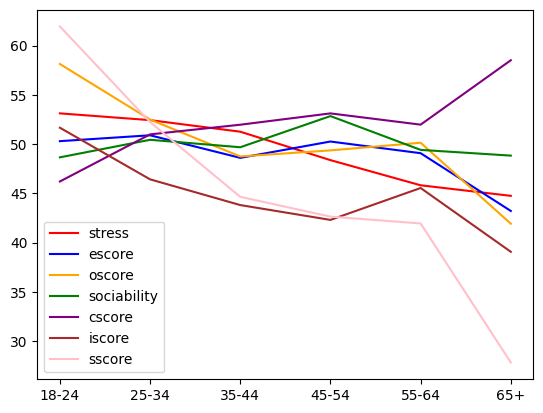

In [985]:
plt.plot(test_visual_group_age["age"], test_visual_group_age["nscore"], label = "stress", c = "red")
plt.plot(test_visual_group_age["age"], test_visual_group_age["escore"], label = "escore", c = "blue")
plt.plot(test_visual_group_age["age"], test_visual_group_age["oscore"], label = "oscore", c = "orange")
plt.plot(test_visual_group_age["age"], test_visual_group_age["ascore"], label = "sociability", c = "green")
plt.plot(test_visual_group_age["age"], test_visual_group_age["cscore"], label = "cscore", c = "purple")
plt.plot(test_visual_group_age["age"], test_visual_group_age["iscore"], label = "iscore", c = "brown")
plt.plot(test_visual_group_age["age"], test_visual_group_age["sscore"], label = "sscore", c = "pink")

plt.legend()

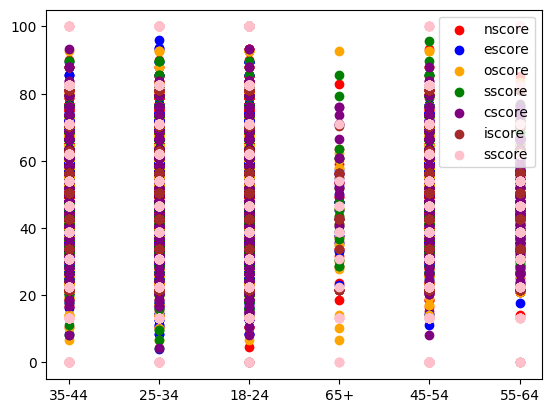

In [986]:
plt.scatter(test_visual["age"], test_visual["nscore"], label = "nscore", c = "red")
plt.scatter(test_visual["age"], test_visual["escore"], label = "escore", c = "blue")
plt.scatter(test_visual["age"], test_visual["oscore"], label = "oscore", c = "orange")
plt.scatter(test_visual["age"], test_visual["ascore"], label = "sscore", c = "green")
plt.scatter(test_visual["age"], test_visual["cscore"], label = "cscore", c = "purple")
plt.scatter(test_visual["age"], test_visual["iscore"], label = "iscore", c = "brown")
plt.scatter(test_visual["age"], test_visual["sscore"], label = "sscore", c = "pink")

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


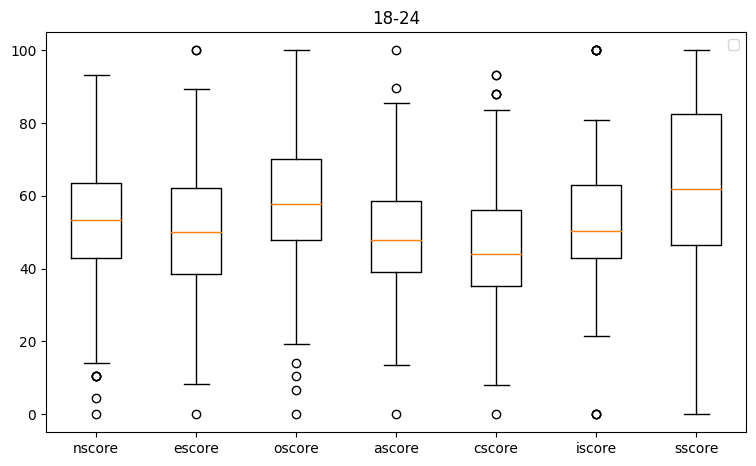

In [987]:
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot([
test_visual[test_visual["age"] == "18-24"]["nscore"], 
test_visual[test_visual["age"] == "18-24"]["escore"], 
test_visual[test_visual["age"] == "18-24"]["oscore"], 
test_visual[test_visual["age"] == "18-24"]["ascore"], 
test_visual[test_visual["age"] == "18-24"]["cscore"], 
test_visual[test_visual["age"] == "18-24"]["iscore"], 
test_visual[test_visual["age"] == "18-24"]["sscore"]])

ax.set_xticklabels(["nscore", "escore", "oscore", "ascore", "cscore", "iscore", "sscore"])

plt.title("18-24")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


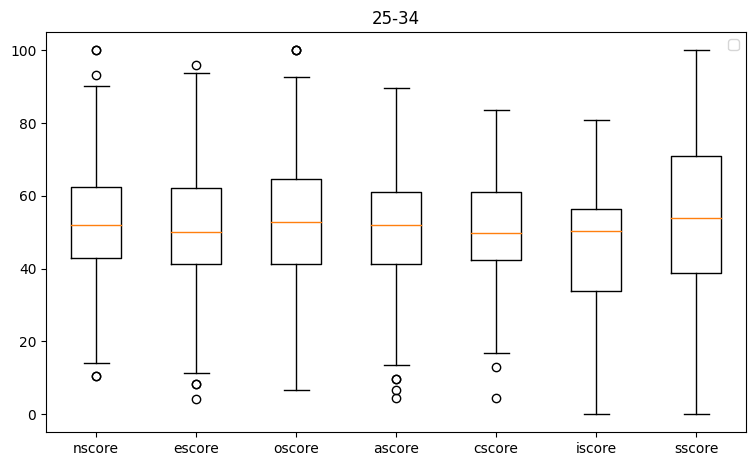

In [988]:
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot([
test_visual[test_visual["age"] == "25-34"]["nscore"], 
test_visual[test_visual["age"] == "25-34"]["escore"], 
test_visual[test_visual["age"] == "25-34"]["oscore"], 
test_visual[test_visual["age"] == "25-34"]["ascore"], 
test_visual[test_visual["age"] == "25-34"]["cscore"], 
test_visual[test_visual["age"] == "25-34"]["iscore"], 
test_visual[test_visual["age"] == "25-34"]["sscore"]])

ax.set_xticklabels(["nscore", "escore", "oscore", "ascore", "cscore", "iscore", "sscore"])

plt.title("25-34")
plt.legend()